## Import necessary libraries 

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import emoji
from collections import Counter
from urlextract import URLExtract
from wordcloud import WordCloud
from urllib.parse import urlparse

In [2]:
f = open("WhatsApp_Chat.txt",'r',encoding='utf-8')

In [3]:
data = f.read()

## Making Dataframe from the text file

In [4]:
# Regular expression pattern
pattern = r'(\d+/\d+/\d+, \d+:\d+\s*[ap]m) - ([^:]+): (.*)'

# Find matches in the chat data
matches = re.findall(pattern, data)

# Create lists to store extracted data
timestamps, senders, messages = [], [], []

# Iterate through matches and extract data
for match in matches:
    timestamps.append(match[0])
    senders.append(match[1])
    messages.append(match[2])

# Create a DataFrame from the lists
df = pd.DataFrame({"timestamp": timestamps, "sender": senders, "message": messages})

# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df['timestamp'], format="%d/%m/%Y, %I:%M %p") 

# Display the DataFrame
df.tail()

,timestamp,sender,message
3236,2024-07-09 21:52:00,Janvi,this
3237,2024-07-09 21:52:00,Janvi,are
3238,2024-07-09 21:52:00,Janvi,last
3239,2024-07-09 21:52:00,Janvi,5
3240,2024-07-09 21:52:00,Niyati,texts shared


## Number of messages sent 

In [5]:
# Create sender counts as a series
sender_count_series = df["sender"].value_counts()
sender_count_series

Niyati    1751
Janvi     1490
Name: sender, dtype: int64

## Barplot of count of messages by each person

<Axes: >

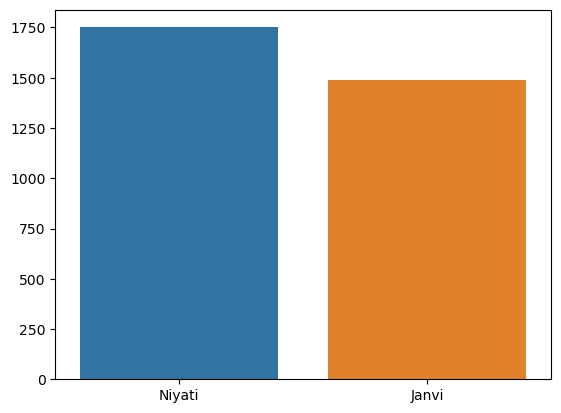

In [6]:
sns.barplot(x=sender_count_series.index, y=sender_count_series.values)

## Pie chart of the messages send by each 

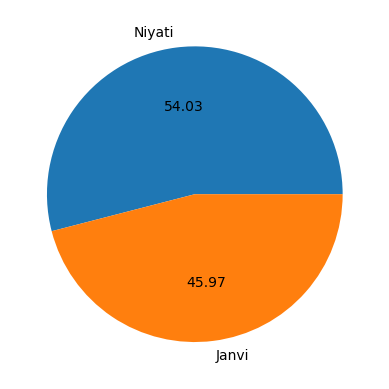

In [7]:
plt.pie(sender_count_series.values, labels= sender_count_series.index, autopct = "%0.2f")
plt.show()

## Most used emoji

In [8]:
emojis = []
users = sender_count_series.index

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [9]:
a = pd.DataFrame(Counter(emojis).most_common(170))

In [10]:
a

,0,1
0,🏻,16
1,👍,15
2,😂,10
3,❤,5
4,🥰,3
5,🤣,2
6,😄,2
7,🖤,2
8,🥂,2
9,👆,2


In [11]:
# Assuming df is your DataFrame with columns: 'user', 'message'
emojis_by_user = {}

for index, row in df.iterrows():
    sender = row['sender']
    message = row['message']

    emojis = [c for c in message if c in emoji.EMOJI_DATA]

    if sender not in emojis_by_user:
        emojis_by_user[sender] = emojis
    else:
        emojis_by_user[sender].extend(emojis)


user_to_analyze = 'Janvi'
user_emojis = emojis_by_user.get(user_to_analyze, [])

# Get the most common emojis used by the user
most_common_emojis = Counter(user_emojis).most_common(10)  # Change 10 to any desired number

# Display the result
print(f"Most common emojis used by {user_to_analyze}:")
most_common_emojis

Most common emojis used by Janvi:


[('🏻', 11),
 ('👍', 9),
 ('😂', 4),
 ('🤣', 2),
 ('🖤', 2),
 ('👆', 2),
 ('🎉', 1),
 ('🥂', 1)]

In [12]:
extractor = URLExtract()

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

## Chart of all the URLs shared   

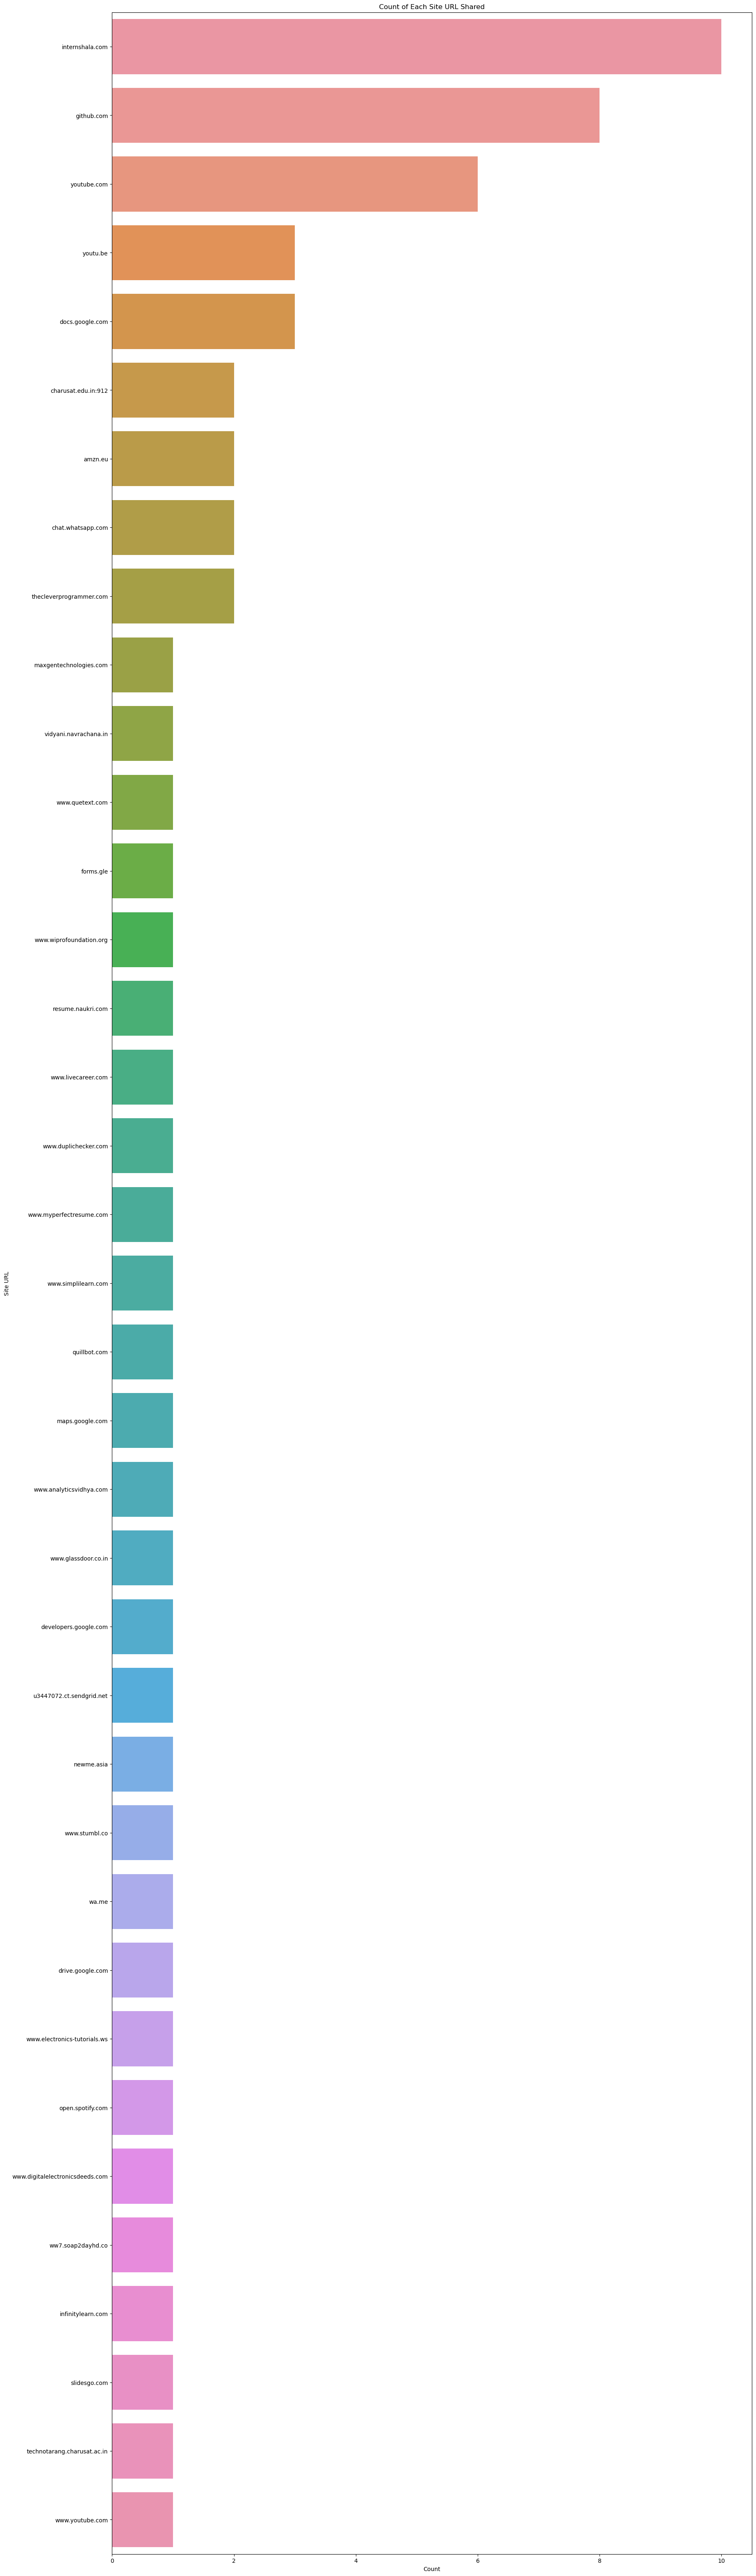

In [13]:
parsed_urls = [urlparse(url) for url in links]
domains = [parsed_url.netloc for parsed_url in parsed_urls]

# Create a DataFrame
df1 = pd.DataFrame({'Domain': domains})

# Create a countplot
plt.figure(figsize=(20, 80))
sns.countplot(y='Domain', data=df1, order=df1['Domain'].value_counts().index)
plt.title('Count of Each Site URL Shared')
plt.xlabel('Count')
plt.ylabel('Site URL')
plt.show()

## Making more columns like year, months,days,hours,minutes 

In [14]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month_name()
df['day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df.head()

,timestamp,sender,message,year,month,day,hour,minute
0,2022-09-09 11:52:00,Niyati,<Media omitted>,2022,September,Friday,11,52
1,2022-09-10 08:57:00,Janvi,this,2022,September,Saturday,8,57
2,2022-09-10 11:13:00,Niyati,are,2022,September,Saturday,11,13
3,2022-09-10 11:13:00,Janvi,the,2022,September,Saturday,11,13
4,2022-09-10 11:13:00,Janvi,first,2022,September,Saturday,11,13


## Finding the month name in which more messages were shared

In [15]:
monthData = df['month'].value_counts()
monthData

April        440
January      369
July         353
March        337
June         298
May          295
December     256
October      233
February     219
August       214
September    144
November      83
Name: month, dtype: int64

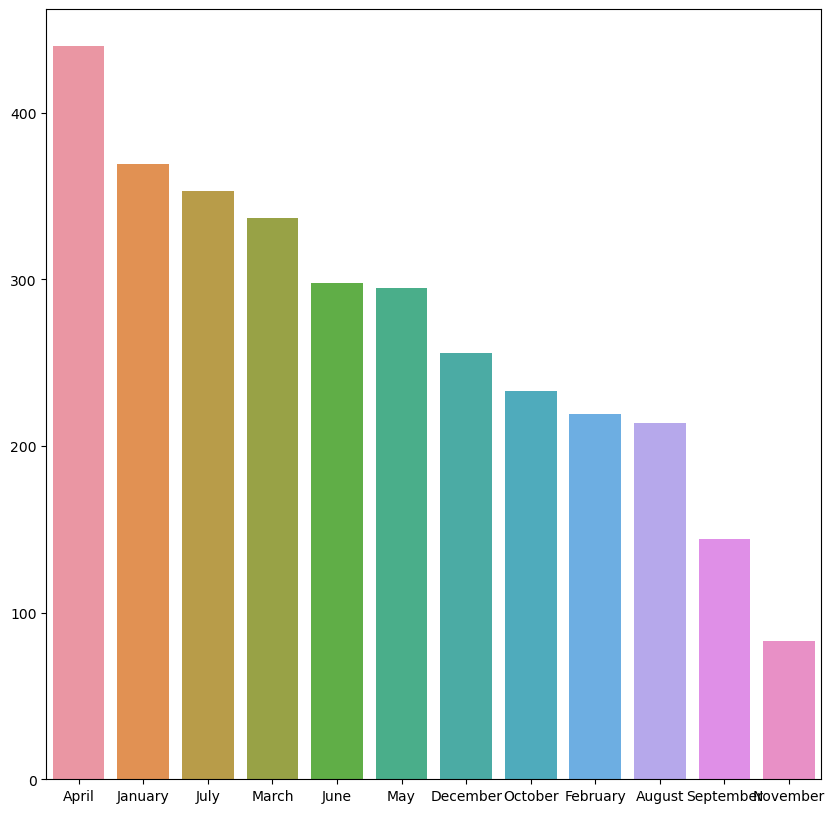

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x=monthData.index, y=monthData.values)
plt.show()

In [17]:
weekData = df['day'].value_counts()
weekData

Tuesday      633
Sunday       615
Saturday     528
Wednesday    438
Friday       367
Monday       365
Thursday     295
Name: day, dtype: int64

<Axes: >

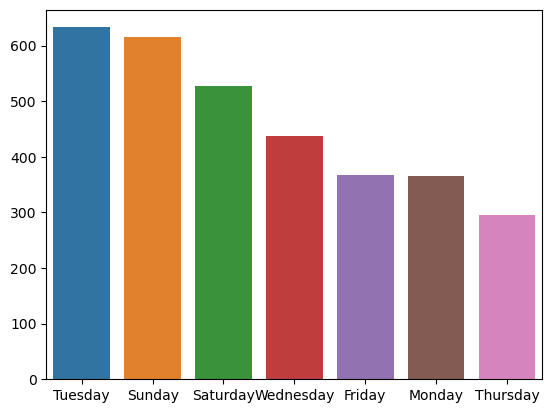

In [18]:
sns.barplot(x=weekData.index, y=weekData.values)

## Yearwise Timeline 

year  month    
2022  December      93
      November      58
      October       78
      September     96
2023  April         62
      August       214
      December     163
      February      82
      January      108
      July         117
      June         155
      March         93
      May          222
      November      25
      October      155
      September     48
2024  April        378
      February     137
      January      261
      July         236
      June         143
      March        244
      May           73
Name: message, dtype: int64


<Axes: xlabel='year', ylabel='count'>

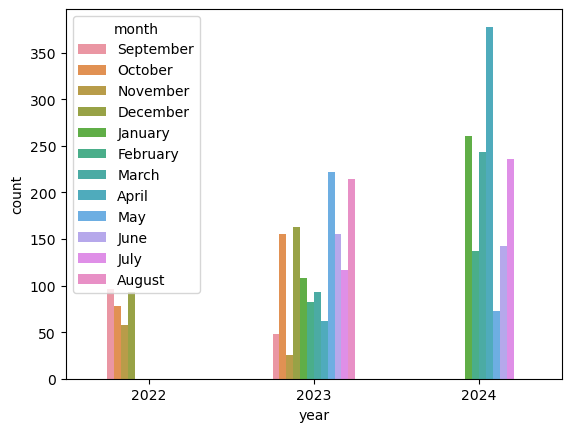

In [19]:
timeline = df.groupby(['year','month']).count()['message']
print(timeline)
sns.countplot(x='year', hue='month', data=df, width = 0.5)

In [20]:
temp = df[df['sender'] != 'group notification'] 

In [21]:
temp

,timestamp,sender,message,year,month,day,hour,minute
0,2022-09-09 11:52:00,Niyati,<Media omitted>,2022,September,Friday,11,52
1,2022-09-10 08:57:00,Janvi,this,2022,September,Saturday,8,57
2,2022-09-10 11:13:00,Niyati,are,2022,September,Saturday,11,13
3,2022-09-10 11:13:00,Janvi,the,2022,September,Saturday,11,13
4,2022-09-10 11:13:00,Janvi,first,2022,September,Saturday,11,13
...,...,...,...,...,...,...,...,...
3236,2024-07-09 21:52:00,Janvi,this,2024,July,Tuesday,21,52
3237,2024-07-09 21:52:00,Janvi,are,2024,July,Tuesday,21,52
3238,2024-07-09 21:52:00,Janvi,last,2024,July,Tuesday,21,52
3239,2024-07-09 21:52:00,Janvi,5,2024,July,Tuesday,21,52


## Getting StopWords from chat 

In [23]:
stop_words = ' '
words = ""
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words += word + ' '

## Displaying The WordCloud of Chat using Matplotlib 

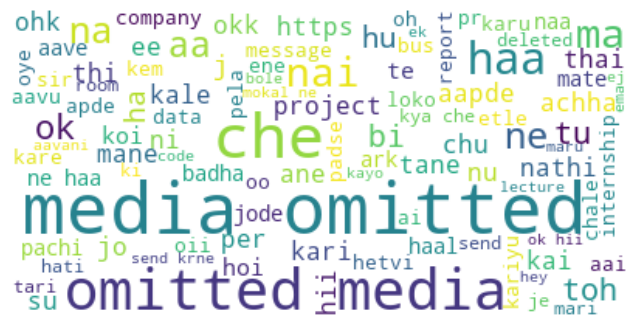

In [24]:
wordcloud = WordCloud(max_words=100, background_color="white").generate(words)

#Display the word cloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Remove unwanted Words 

In [25]:
words_to_remove = ["<media","omitted>"]

new_text = ' '.join([word for word in words.split() if word not in words_to_remove])

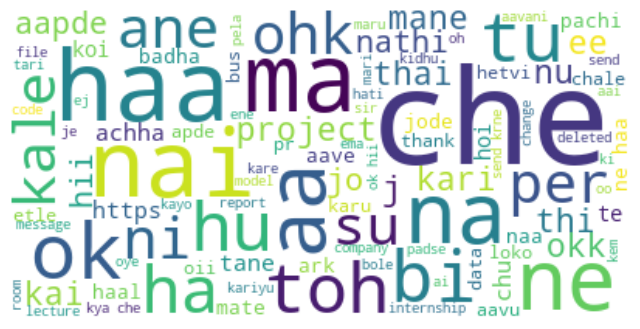

In [26]:
wordcloud = WordCloud(max_words=100, background_color="white").generate(new_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()